# NN.Backprop.01: Gewichtsupdates für versteckte Schichten


## Forward
$$
A^{[0]} = X
$$

$$
Z^{[1]} = W^{[1]}A^{[0]} + b^{[1]}, \quad A^{[1]} = \sigma(Z^{[1]})
$$

$$
Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}, \quad A^{[2]} = \sigma(Z^{[2]})
$$

$$
Z^{[3]} = W^{[3]}A^{[2]} + b^{[3]}, \quad A^{[3]}=\hat Y=\sigma(Z^{[3]})
$$

Sigmoid:
$$
\sigma'(Z)=\sigma(Z)\bigl(1-\sigma(Z)\bigr)
$$

## Loss 
$$
L = -\bigl(Y\log A^{[3]} + (1-Y)\log(1-A^{[3]})\bigr)
$$

Vereinfachung 
$$
\frac{\partial L}{\partial Z^{[3]}} = A^{[3]} - Y
$$


## Backpropagation 

$$
\frac{\partial L}{\partial Z^{[3]}} = A^{[3]} - Y
$$

$$
\frac{\partial L}{\partial Z^{[2]}}
=
\Big((W^{[3]})^T (A^{[3]}-Y)\Big)
\odot \sigma'(Z^{[2]})
$$

$$
\frac{\partial L}{\partial Z^{[1]}}
=
\Big((W^{[2]})^T \frac{\partial L}{\partial Z^{[2]}}\Big)
\odot \sigma'(Z^{[1]})
$$


## Gradienten der ersten versteckten Schicht

$$
\boxed{
\frac{\partial L}{\partial W^{[1]}}
=
\left(\frac{\partial L}{\partial Z^{[1]}}\right) X^T
}
$$

$$
\boxed{
\frac{\partial L}{\partial b^{[1]}}
=
\frac{\partial L}{\partial Z^{[1]}}
}
$$



## Update-Regeln

$$
W^{[1]} \leftarrow W^{[1]} - \eta \frac{\partial L}{\partial W^{[1]}}
$$

$$
b^{[1]} \leftarrow b^{[1]} - \eta \frac{\partial L}{\partial b^{[1]}}
$$

### Endergebnis 
$$
W^{[1]}
\leftarrow
W^{[1]}
-
\eta\;
\Big(
(W^{[2]})^{T}
\big(
(W^{[3]})^{T}(A^{[3]} - Y)
\odot
\sigma'(Z^{[2]})
\big)
\Big)
\odot
\sigma'(Z^{[1]})
\;X^{T}
$$

# NN.Backprop.02 – Forward- und Backpropagation

Gegeben:
- Aktivierung: \(\sigma(z)=\frac{1}{1+e^{-z}}\)
- Trainingsbeispiel: \((x,y_T)=(0,0.5)\)
- Lernrate: \(\alpha=0.01\)

## 1) Forward Pass

### Hidden-Neuron
$$
z_h = (-1)\cdot x + 1\cdot 1
$$
Für \(x=0\):
$$
z_h = 1
$$

$$
a_h = \sigma(1) \approx 0.7311
$$

### Output-Neuron
$$
z_y = 1\cdot a_h + 2\cdot x - 2\cdot 1
$$
$$
z_y = 0.7311 - 2 = -1.2689
$$

$$
y = \sigma(-1.2689) \approx 0.2195
$$


## 2) Fehler

$$
L = \frac12 (y-y_T)^2
= \frac12 (0.2195 - 0.5)^2
\approx 0.0393
$$


## 3) Backpropagation

### Ableitung am Output
$$
\frac{\partial L}{\partial y} = y - y_T = -0.2805
$$

$$
\sigma'(z_y) = y(1-y) \approx 0.2195 \cdot 0.7805 = 0.1713
$$

$$
\frac{\partial L}{\partial z_y}
=
(y-y_T)\sigma'(z_y)
\approx -0.0481
$$



## 4) Gradienten der Gewichte 

### Gewicht \(w_{h\to y}\)
$$
\frac{\partial L}{\partial w_{h\to y}}
=
\frac{\partial L}{\partial z_y}\cdot a_h
\approx -0.0481 \cdot 0.7311
\approx -0.0352
$$

### Gewicht \(w_{x\to y}\)
$$
\frac{\partial L}{\partial w_{x\to y}}
=
\frac{\partial L}{\partial z_y}\cdot x
= 0
$$

### Bias \(b_y\)
$$
\frac{\partial L}{\partial b_y}
=
\frac{\partial L}{\partial z_y}
\approx -0.0481
$$


## 5) Backprop zum Hidden-Neuron

$$
\sigma'(z_h) = a_h(1-a_h) \approx 0.1966
$$

$$
\frac{\partial L}{\partial z_h}
=
\frac{\partial L}{\partial z_y}\cdot w_{h\to y}\cdot \sigma'(z_h)
\approx -0.00946
$$


## 6) Gradienten der Hidden-Gewichte

### Gewicht \(w_{x\to h}\)
$$
\frac{\partial L}{\partial w_{x\to h}}
=
\frac{\partial L}{\partial z_h}\cdot x
= 0
$$

### Bias \(b_h\)
$$
\frac{\partial L}{\partial b_h}
=
\frac{\partial L}{\partial z_h}
\approx -0.00946
$$


## 7) Gewichtsupdates (\(\alpha=0.01\))

$$
w_{h\to y}^{neu} = 1 - 0.01\cdot(-0.0352) = 1.000352
$$

$$
b_y^{neu} = -2 - 0.01\cdot(-0.0481) = -1.999519
$$

$$
b_h^{neu} = 1 - 0.01\cdot(-0.00946) = 1.000095
$$

Alle Gewichte mit Faktor \(x\) bleiben unverändert, da \(x=0\).

# NN.Backprop.03: MLP und Backpropagation

Epoch 0, Loss: 0.292629
Epoch 500, Loss: 0.000045
Epoch 1000, Loss: 0.000021
Epoch 1500, Loss: 0.000014
Epoch 2000, Loss: 0.000011
Epoch 2500, Loss: 0.000010
Epoch 3000, Loss: 0.000009
Epoch 3500, Loss: 0.000008
Epoch 4000, Loss: 0.000008
Epoch 4500, Loss: 0.000008
Epoch 5000, Loss: 0.000007
Epoch 5500, Loss: 0.000007
Epoch 6000, Loss: 0.000007
Epoch 6500, Loss: 0.000007
Epoch 7000, Loss: 0.000007
Epoch 7500, Loss: 0.000007
Final Loss: 6.727279237187486e-06
Train Accuracy: 1.0


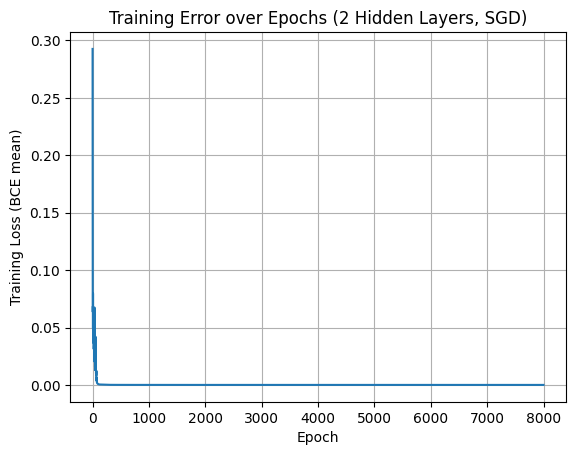

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Activations

def relu(z):
    return np.maximum(0.0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

def sigmoid(z):
    # numerisch stabiler Sigmoid
    z = np.clip(z, -50, 50)
    return 1.0 / (1.0 + np.exp(-z))


# Loss: Binary Cross-Entropy 

def bce_loss(y_hat, y):
    eps = 1e-9
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


class MLP2Hidden:
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim, lr=0.05, seed=0, lr_decay=0.9995):
        self.lr0 = lr
        self.lr_decay = lr_decay
        rng = np.random.default_rng(seed)

        # He init (ReLU): std = sqrt(2/fan_in)
        self.W1 = rng.normal(0.0, np.sqrt(2.0 / input_dim), size=(input_dim, hidden1_dim))
        self.b1 = np.zeros((1, hidden1_dim))

        self.W2 = rng.normal(0.0, np.sqrt(2.0 / hidden1_dim), size=(hidden1_dim, hidden2_dim))
        self.b2 = np.zeros((1, hidden2_dim))

        # Output: Sigmoid 
        self.W3 = rng.normal(0.0, np.sqrt(1.0 / hidden2_dim), size=(hidden2_dim, output_dim))
        self.b3 = np.zeros((1, output_dim))

        self.epoch = 0

    def forward(self, X):
        self.X = X

        self.Z1 = X @ self.W1 + self.b1
        self.A1 = relu(self.Z1)

        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = relu(self.Z2)

        self.Z3 = self.A2 @ self.W3 + self.b3
        self.A3 = sigmoid(self.Z3)  # output sigmoid
        return self.A3

    def backward(self, Y):
        """
        Y: shape (1, output_dim) for single-sample SGD
        """
        # current learning rate with decay
        lr = self.lr0 * (self.lr_decay ** self.epoch)

        # Output layer:
        # For Sigmoid + BCE: dZ3 = A3 - Y
        dZ3 = self.A3 - Y                       # (1, C)
        dW3 = self.A2.T @ dZ3                   # (H2, C)
        db3 = dZ3                               # (1, C)

        # Backprop into hidden2 (ReLU)
        dA2 = dZ3 @ self.W3.T                   # (1, H2)
        dZ2 = dA2 * relu_deriv(self.Z2)         # (1, H2)
        dW2 = self.A1.T @ dZ2                   # (H1, H2)
        db2 = dZ2                               # (1, H2)

        # Backprop into hidden1 (ReLU)
        dA1 = dZ2 @ self.W2.T                   # (1, H1)
        dZ1 = dA1 * relu_deriv(self.Z1)         # (1, H1)
        dW1 = self.X.T @ dZ1                    # (D, H1)
        db1 = dZ1                               # (1, H1)

        # Update
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, Y, epochs=8000, print_every=500):
        losses = []
        n = X.shape[0]

        for ep in range(epochs):
            self.epoch = ep

            # shuffle each epoch
            idx = np.random.permutation(n)
            Xs, Ys = X[idx], Y[idx]

            epoch_loss = 0.0

            # SGD: update per sample
            for i in range(n):
                xi = Xs[i:i+1]
                yi = Ys[i:i+1]

                y_hat = self.forward(xi)
                epoch_loss += bce_loss(y_hat, yi)

                self.backward(yi)

            epoch_loss /= n
            losses.append(epoch_loss)

            if ep % print_every == 0:
                print(f"Epoch {ep}, Loss: {epoch_loss:.6f}")

        return losses

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1), probs


# Load + prep Iris

df = pd.read_csv("iris.csv")

X = df.iloc[:, :-1].values.astype(float)
y = df.iloc[:, -1].values

# normalize (standardization)
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-9)

# one-hot labels
classes = np.unique(y)
Y = np.zeros((len(y), len(classes)))
for i, c in enumerate(classes):
    Y[y == c, i] = 1.0


# Train

mlp = MLP2Hidden(
    input_dim=4,
    hidden1_dim=32,
    hidden2_dim=16,
    output_dim=3,
    lr=0.05,
    seed=0,
    lr_decay=0.9995
)

losses = mlp.train(X, Y, epochs=8000, print_every=500)


# Evaluate

y_pred, probs = mlp.predict(X)
y_true = np.argmax(Y, axis=1)
acc = (y_pred == y_true).mean()

print("Final Loss:", losses[-1])
print("Train Accuracy:", acc)


# Plot

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (BCE mean)")
plt.title("Training Error over Epochs (2 Hidden Layers, SGD)")
plt.grid(True)
plt.show()

Durch Erweiterung des Netzes um eine zweite versteckte Schicht und Training mit stochastischem Gradientenabstieg konvergiert der Trainingsfehler auf einen Wert nahe Null (Loss \(< 10^{-4}\)) bereits nach ca. 500 Epochen und erreicht nach 8000 Epochen einen nahezu verschwindenden Fehler (≈6.7*10^{-6}) bei einer Trainingsgenauigkeit von 100 %.